In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [2]:
dataset = pd.read_csv("banking_dataset.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset.isnull().sum().sum()

np.int64(0)

In [5]:
dataset.duplicated().sum()

np.int64(0)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Droping unnecessary column 

In [9]:
dataset.drop('RowNumber' , axis = 1 , inplace = True)

In [10]:
# rename the columns

In [11]:
dataset = dataset.rename(columns={
    "CreditScore": "Credit_Score",
    "NumOfProducts": "Number_of_Products",
    "HasCrCard": "HasCr_Card",
    "IsActiveMember": "Active_Member",
    "EstimatedSalary": "Estimated_Salary"
})


In [12]:
dataset.columns

Index(['CustomerId', 'Surname', 'Credit_Score', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Number_of_Products', 'HasCr_Card',
       'Active_Member', 'Estimated_Salary', 'Churn'],
      dtype='object')

In [13]:
dataset.shape

(10000, 13)

In [14]:
def categorize_age(Age):
    if Age < 20:
        return '< 20'
    elif Age <30:
        return '20-30'
    elif Age <40:
        return '30-40'
    elif Age <50:
        return '40-50'
    elif Age <60:
        return '50-60'
    elif Age <70:
        return '60-70'
    else:
        return '>70'
        
        
dataset['Age_Group'] = dataset['Age'].apply(categorize_age) 

In [15]:
dataset.head()

,CustomerId,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Number_of_Products,HasCr_Card,Active_Member,Estimated_Salary,Churn,Age_Group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


In [16]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

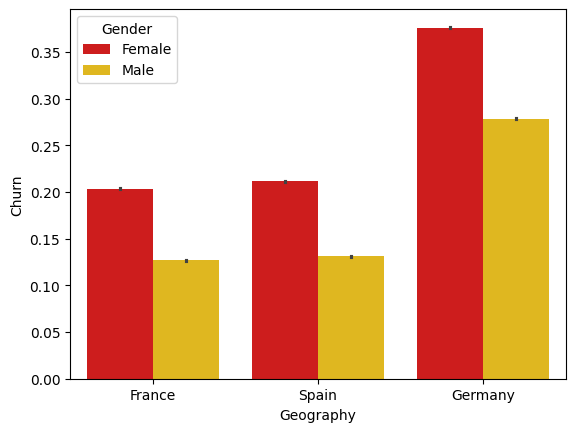

In [17]:
sns.barplot(
    x = "Geography",
    y = 'Churn',
    data = dataset,
    hue = "Gender",
    palette= "hot",
    ci = 5
)

plt.show()

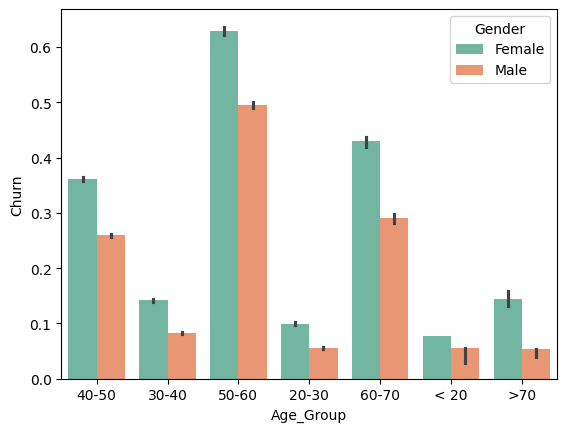

In [18]:
sns.barplot(
    x = 'Age_Group',
    y = "Churn",
    data = dataset,
    hue = "Gender",
    palette= "Set2",
    ci = 20
    
)

plt.show()

In [19]:
dataset.head(1)

,CustomerId,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Number_of_Products,HasCr_Card,Active_Member,Estimated_Salary,Churn,Age_Group
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,40-50


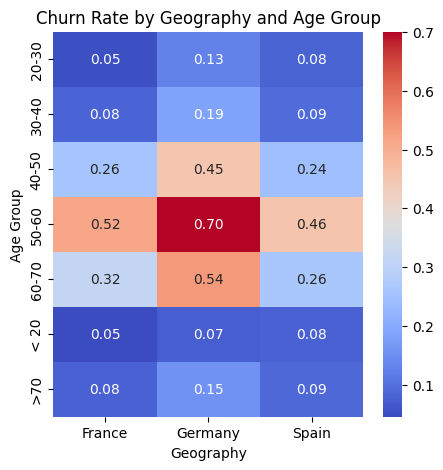

In [20]:
plt.figure(figsize = (5,5))
# Create a pivot table for heatmap
pivot_table = dataset.pivot_table(index="Age_Group", columns="Geography", values="Churn", aggfunc="mean")

# Plot the heatmap
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="coolwarm", 
    fmt=".2f"
)
plt.title("Churn Rate by Geography and Age Group")
plt.xlabel("Geography")
plt.ylabel("Age Group")
plt.show()


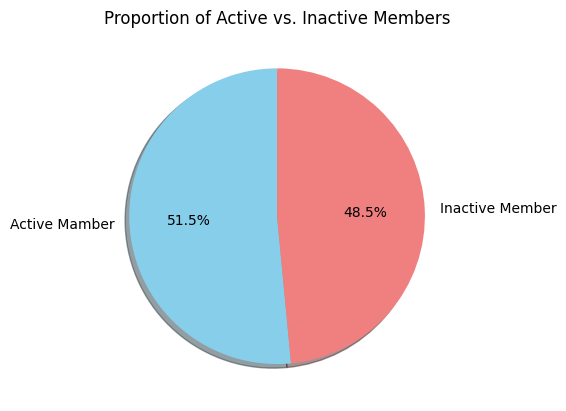

In [21]:
data = dataset['Active_Member'].value_counts()
labels = ['Active Mamber' , 'Inactive Member']

plt.pie(
    data,
    labels= labels,
    autopct= '%1.1f%%',
    shadow= True,
    startangle=90,  
    colors=["skyblue", "lightcoral"]
    
)


plt.title("Proportion of Active vs. Inactive Members")
plt.show()

In [22]:
# Machine Learning Algorithm for prediction

In [23]:
X = dataset.drop(columns= ['Churn' , 'Age_Group'])
y = dataset.Churn

In [24]:
X = pd.get_dummies(X , drop_first= True)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.33 , random_state= 47)

In [26]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [27]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = xgb.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test , y_pred)

In [30]:
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 0.85


In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2621
           1       0.70      0.47      0.56       679

    accuracy                           0.85      3300
   macro avg       0.78      0.71      0.73      3300
weighted avg       0.84      0.85      0.84      3300



In [32]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[2483  138]
 [ 362  317]]
